In [1]:
from pathlib import Path
import sys
papylio_path = Path.cwd()
for i in range(20):
    papylio_path = papylio_path.parent
    if papylio_path.name == 'papylio':
        break
        
sys.path.append(str(papylio_path))
import papylio as pp

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

experiment_path = papylio_path / 'tests' / 'integration' / 'data' / 'Papylio example dataset - analyzed'
experiment_path

exp = pp.Experiment(experiment_path)
file = exp.files.select('HJ', 'name')[0]

Import files: 100%|██████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 3471.82it/s]



Initialize experiment: 
C:\Users\user\surfdrive\Promotie\Code\Python\papylio\tests\integration\data\Papylio example dataset - analyzed


# CDF fit

One method of determining the reaction parameters is fitting the cumulative density function (CDF), which can be obtained by integrating the PDF from $0$ to $t$:

$$
\text{PDF} = p(t) = \sum_{i=1}^{n} P_i k_i e^{-k_i t}
$$

$$
\text{CDF} = P(t) = \int_0^t \sum_{i=1}^{n} P_i k_i e^{-k_i t'} dt' = \\
\sum_{i=1}^{n} \int_0^t P_i k_i e^{-k_i t'} dt' = \\
\sum_{i=1}^{n} \left[ - P_i e^{-k_i t'} \right]_0^t = \\
\sum_{i=1}^{n} P_i - P_i e^{-k_i t} = \\
\sum_{i=1}^{n} P_i- \sum_{i=1}^{n} P_i e^{-k_i t}
$$

Since at $t=\infty$ the CDF should be equal to 1, we have $\sum_{i=1}^{n} P_i = 1$ and thereby

$$
\text{CDF} = 1-\sum_{i=1}^{n} P_i e^{-k_i t}
$$

Fitting the CDF has the advantage of not requiring any binning, however, for transition rates of the same order of magnitude as the frame rate it will be important to use a truncated probability distribution as explained for [maximum likelihood estimation](./cdf_fit.ipynb). For the cdf we can leave the lower truncation value as a free fit parameter, thus not requiring an estimation by the user (contrary to maximum likelihood estimation). As shown by the plots below, this results in a truncation value close to half the frame interval.

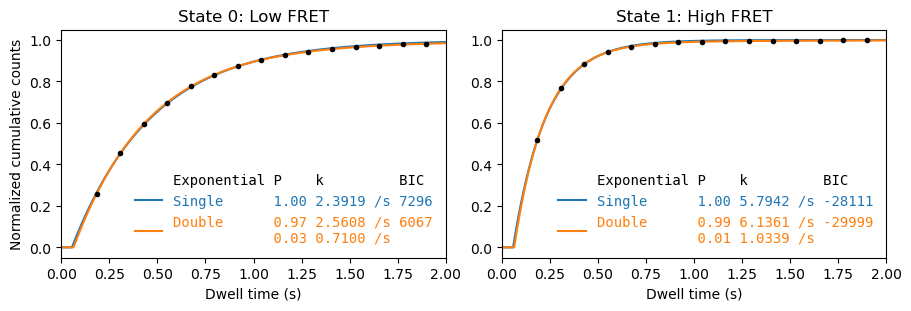

In [2]:
fig, axes = plt.subplots(1,2, figsize=(9,3), layout='constrained')
_ = file.analyze_dwells(method='cdf_fit', number_of_exponentials=[1,2], state_names={0: 'Low FRET',  1:'High FRET'},
                       plot=True, plot_dwell_analysis_kwargs=dict(plot_type='cdf', plot_range=(0,2), axes=axes))

Plotting the PDF using the CDF fit parameters shows that this also corresponds well to the dwell time histogram.

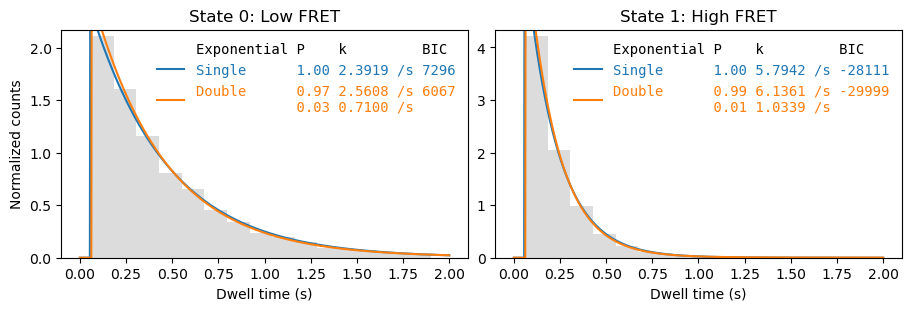

In [3]:
fig, axes = plt.subplots(1,2, figsize=(9,3), layout='constrained')
_  = file.plot_dwell_analysis(plot_type='pdf', plot_range=(0,2), axes=axes, log=False)